In [1]:
import pandas as pd
import numpy as np
import datetime

In [2]:
df = pd.read_csv("data.csv",index_col=0)

In [3]:
df.head()

,ALICE,CHR,ATOM,AXS,TLM,DOGE,XRP,ETH,EOS,BCH,...,DOT,LINK,ZEN,NEAR,SOL,AUDIO,BTT,ALPHA,RAY,FTM
2021-09-02 04:26:00,17.93,0.4405,25.19,72.99,0.3310,0.2886,1.2097,3726.17,5.240,642.7,...,32.57,29.55,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
2021-09-02 04:27:00,17.96,0.4407,25.02,73.06,0.3310,0.2888,1.2106,3729.31,5.243,642.7,...,32.79,29.61,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
2021-09-02 04:28:00,17.95,0.4409,24.98,73.10,0.3312,0.2886,1.2113,3732.83,5.244,642.7,...,32.64,29.49,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
2021-09-02 04:29:00,17.96,0.4409,25.03,73.14,0.3315,0.2886,1.2118,3734.70,5.243,642.6,...,32.70,29.55,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
2021-09-02 04:30:00,17.92,0.4404,24.98,73.02,0.3312,0.2885,1.2110,3728.89,5.234,642.3,...,32.64,29.46,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047


In [5]:

import re
def cut_data(df, n):
    start = re.sub(":\d\d:", ":00:", str(df.index[0]))
    bins = pd.date_range(start, df.index[-1], freq=f'{n}Min')
    dti = pd.DatetimeIndex([bins[-1] + datetime.timedelta(minutes=n)])
    bins = bins.append(dti)
    cats = pd.cut(pd.to_datetime(df.index), bins=bins, labels=bins[:-1],right=False)
    df["cats"] = cats
    df1 = df.groupby(["cats"]).apply(lambda i: i.iloc[-1] if len(i) > 0 else None)
    df1.fillna(method='bfill', inplace=True)
    df1.index = cats.categories
    df1.drop('cats', axis=1, inplace=True)
    return df1


def reset(n, slid, crypto,offset=True):
    if offset:
        df = cut_data(data.tail(n*200), n)
    else:
        df = cut_data(data, n)
    item = df.tail(slid)
    scale = StandardScaler()
    t = scale.fit_transform(item)
    # print(t.shape,len(data.columns),data.columns)
    tdata = pd.DataFrame(data=t, columns=data.columns[:])
    alice_similar = similarity(tdata, crypto)

    sortedsim = alice_similar.sort_values(ascending=False)
    fdf = simi_filter(tdata, sortedsim, 3)
    fdf.index = df.tail(slid).index
    # print(f"raw similary: {sortedsim}")
    # print(f"{crypto} {n} similarity :{fdf.columns}")
    fdf['mean'] = fdf.mean(axis=1)
    return fdf

def reset_raw(n,offset=True):
    if offset:
        df = cut_data(data.tail(n*200), n)
    else:
        df = cut_data(data, n)
    return df



def bsearch(arr, less, step):
    candidate = {}
    for i in range(arr.shape[0] - less-1, -1, -step):
        t = []
        bound = less
        while i - bound > 0 and i + bound < arr.shape[0]:
            t.append(np.sum(arr[i - bound:i + bound+1]))
            if len(t)>3 and all([t[-1]-t[-2]<0,t[-2]-t[-1]<0]):
                t = t[:-3]
                print("continum")
                break
            if len(t)>2 and (t[-1] /t[-2]) < 0.85:
                t = t[:-1]
                break
            bound += 1
        if not t:
            continue
        k = max(t)
        b = t.index(k) + less
        candidate[i] = (k,b)
    temp = []
    for anchor,(total,bound) in candidate.items():
        temp.append([anchor,total,bound])
    data = np.round(np.array(temp),2)
    data = data[::-1]
    return data

In [6]:
data = df

In [7]:
raw3 = reset_raw(15)


d:\envs\crypt\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [8]:
pch= (raw3.shift(1) - raw3)/raw3.shift(1)

<AxesSubplot:>

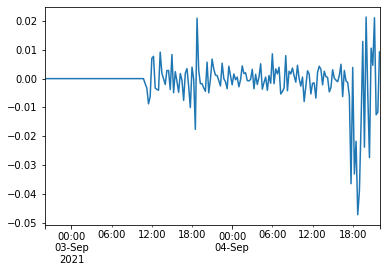

In [9]:
pch["AXS"].plot()

<AxesSubplot:>

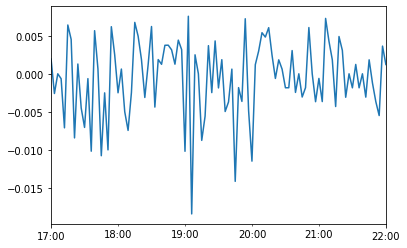

In [36]:
pch["MATIC"][100:].plot()

In [43]:
xx = np.linspace(-10,10,1000)
yy = np.sin(xx)
import matplotlib.pyplot as plt 


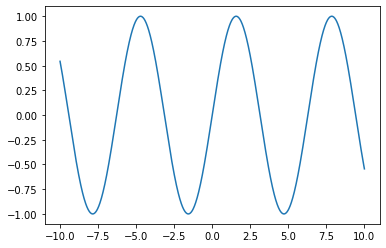

[26, 183, 340, 497, 654, 811, 968, 996]

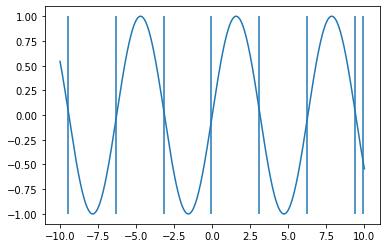

In [11]:
raw3

,ALICE,CHR,ATOM,AXS,TLM,DOGE,XRP,ETH,EOS,BCH,...,DOT,LINK,ZEN,NEAR,SOL,AUDIO,BTT,ALPHA,RAY,FTM
2021-09-02 20:00:00,18.23,0.4293,24.17,73.83,0.3227,0.2935,1.2522,3784.26,5.235,659.2,...,32.44,29.69,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
2021-09-02 20:15:00,18.23,0.4293,24.17,73.83,0.3227,0.2935,1.2522,3784.26,5.235,659.2,...,32.44,29.69,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
2021-09-02 20:30:00,18.23,0.4293,24.17,73.83,0.3227,0.2935,1.2522,3784.26,5.235,659.2,...,32.44,29.69,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
2021-09-02 20:45:00,18.23,0.4293,24.17,73.83,0.3227,0.2935,1.2522,3784.26,5.235,659.2,...,32.44,29.69,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
2021-09-02 21:00:00,18.23,0.4293,24.17,73.83,0.3227,0.2935,1.2522,3784.26,5.235,659.2,...,32.44,29.69,104.26,6.465,139.65,2.879,0.004941,1.4325,12.805,0.9047
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-04 21:00:00,19.76,0.4557,25.13,90.31,0.3389,0.2987,1.2763,3907.00,5.677,711.1,...,33.26,30.78,104.45,6.257,141.29,2.856,0.004838,1.4014,12.995,1.0817
2021-09-04 21:15:00,19.59,0.4527,24.92,88.40,0.3401,0.2979,1.2717,3908.42,5.645,709.4,...,33.14,30.76,103.81,6.179,140.72,2.841,0.004820,1.3935,13.030,1.0659
2021-09-04 21:30:00,19.89,0.4533,25.08,89.51,0.3431,0.2996,1.2721,3915.96,5.658,711.7,...,33.10,30.76,104.06,6.219,141.27,2.847,0.004825,1.3989,13.072,1.0568
2021-09-04 21:45:00,19.83,0.4530,24.91,90.55,0.3418,0.3026,1.2707,3909.55,5.646,710.0,...,33.04,30.71,104.23,6.219,140.96,2.870,0.004826,1.3888,13.014,1.0603


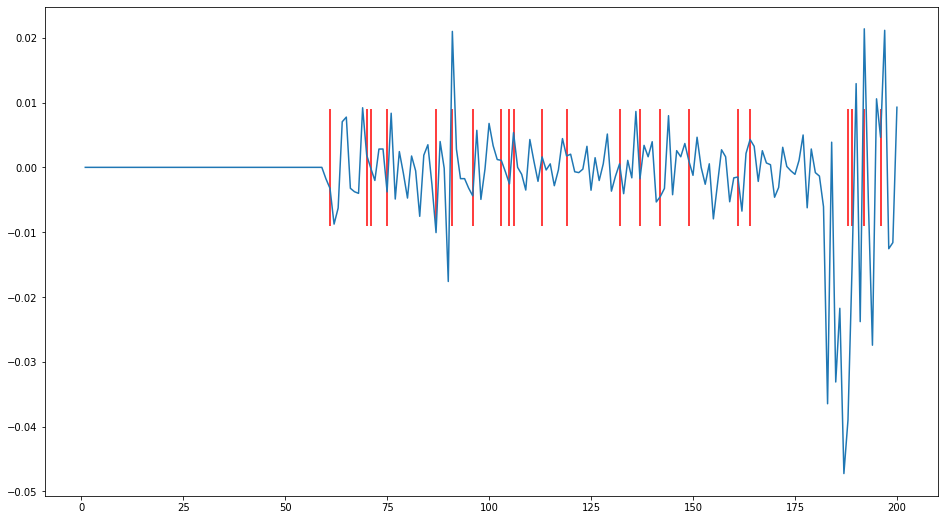

In [96]:
plt.figure(figsize=(16,9))
plt.plot(range(pch.shape[0]),pch["AXS"])

plt.vlines(seg,[-0.009]*len(seg),[0.009]*len(seg),color='r')

In [12]:
pch

,ALICE,CHR,ATOM,AXS,TLM,DOGE,XRP,ETH,EOS,BCH,...,DOT,LINK,ZEN,NEAR,SOL,AUDIO,BTT,ALPHA,RAY,FTM
2021-09-02 20:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-02 20:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-09-02 20:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-09-02 20:45:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-09-02 21:00:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-04 21:00:00,0.007035,0.004152,-0.001594,0.004629,-0.002663,0.002005,0.001955,0.002020,-0.002649,-0.003528,...,-0.000602,0.001946,-0.001150,-0.002243,0.007516,-0.002809,0.003502,-0.008129,0.004291,0.018243
2021-09-04 21:15:00,0.008603,0.006583,0.008357,0.021149,-0.003541,0.002678,0.003604,-0.000363,0.005637,0.002391,...,0.003608,0.000650,0.006127,0.012466,0.004034,0.005252,0.003721,0.005637,-0.002693,0.014607
2021-09-04 21:30:00,-0.015314,-0.001325,-0.006421,-0.012557,-0.008821,-0.005707,-0.000315,-0.001929,-0.002303,-0.003242,...,0.001207,0.000000,-0.002408,-0.006474,-0.003908,-0.002112,-0.001037,-0.003875,-0.003223,0.008537
2021-09-04 21:45:00,0.003017,0.000662,0.006778,-0.011619,0.003789,-0.010013,0.001101,0.001637,0.002121,0.002389,...,0.001813,0.001625,-0.001634,0.000000,0.002194,-0.008079,-0.000207,0.007220,0.004437,-0.003312


In [17]:
pr =pch.iloc[50:].rolling(4).sum()

In [23]:
pr.sum().abs().sort_values()

ZEN      0.001143
AUDIO    0.021305
SOL      0.044290
XRP      0.065753
RAY      0.074734
DOT      0.085633
BTT      0.090736
DOGE     0.098531
AAVE     0.104807
ALPHA    0.109962
ETH      0.132871
ATOM     0.137233
LINK     0.144706
NEAR     0.146389
CHR      0.222504
TLM      0.235532
BCH      0.304318
EOS      0.311328
ALICE    0.338296
MATIC    0.511403
FTM      0.679515
LTC      0.687213
AXS      0.795640
dtype: float64

In [25]:
weight=np.linspace(1,3,pr.shape[0])
weight

array([1.        , 1.01333333, 1.02666667, 1.04      , 1.05333333,
       1.06666667, 1.08      , 1.09333333, 1.10666667, 1.12      ,
       1.13333333, 1.14666667, 1.16      , 1.17333333, 1.18666667,
       1.2       , 1.21333333, 1.22666667, 1.24      , 1.25333333,
       1.26666667, 1.28      , 1.29333333, 1.30666667, 1.32      ,
       1.33333333, 1.34666667, 1.36      , 1.37333333, 1.38666667,
       1.4       , 1.41333333, 1.42666667, 1.44      , 1.45333333,
       1.46666667, 1.48      , 1.49333333, 1.50666667, 1.52      ,
       1.53333333, 1.54666667, 1.56      , 1.57333333, 1.58666667,
       1.6       , 1.61333333, 1.62666667, 1.64      , 1.65333333,
       1.66666667, 1.68      , 1.69333333, 1.70666667, 1.72      ,
       1.73333333, 1.74666667, 1.76      , 1.77333333, 1.78666667,
       1.8       , 1.81333333, 1.82666667, 1.84      , 1.85333333,
       1.86666667, 1.88      , 1.89333333, 1.90666667, 1.92      ,
       1.93333333, 1.94666667, 1.96      , 1.97333333, 1.98666

In [26]:
pr * weight.reshape([-1,1])

,ALICE,CHR,ATOM,AXS,TLM,DOGE,XRP,ETH,EOS,BCH,...,DOT,LINK,ZEN,NEAR,SOL,AUDIO,BTT,ALPHA,RAY,FTM
2021-09-03 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03 09:15:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2021-09-03 09:30:00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-04 21:00:00,0.025024,0.021826,-0.027233,-0.051678,0.005015,-0.016931,-0.011607,-0.004172,-0.026681,-0.007983,...,-0.011594,-0.015414,-0.007934,-0.018018,0.026094,-0.027019,-0.018430,-0.053274,-0.026576,0.046907
2021-09-04 21:15:00,0.069910,0.051727,0.012833,0.026360,-0.000212,0.015836,0.013211,0.003709,0.005667,0.015752,...,0.002606,-0.000027,0.019260,0.033554,0.052065,0.002002,0.014046,-0.010807,-0.024096,0.099509
2021-09-04 21:30:00,0.002458,0.039629,0.013995,0.070765,-0.057040,-0.005032,0.015361,0.000330,0.010936,-0.000071,...,0.021446,0.010606,0.014462,0.004467,0.051473,0.007236,0.012867,-0.012528,-0.008484,0.144756
2021-09-04 21:45:00,0.009979,0.030081,0.021265,0.004788,-0.033557,-0.032964,0.018951,0.004076,0.008379,-0.005946,...,0.017997,0.012606,0.002793,0.011200,0.029378,-0.023139,0.017853,0.002548,0.008396,0.113717


In [13]:
pr = pch.iloc[50:].rolling(20).sum()

<AxesSubplot:>

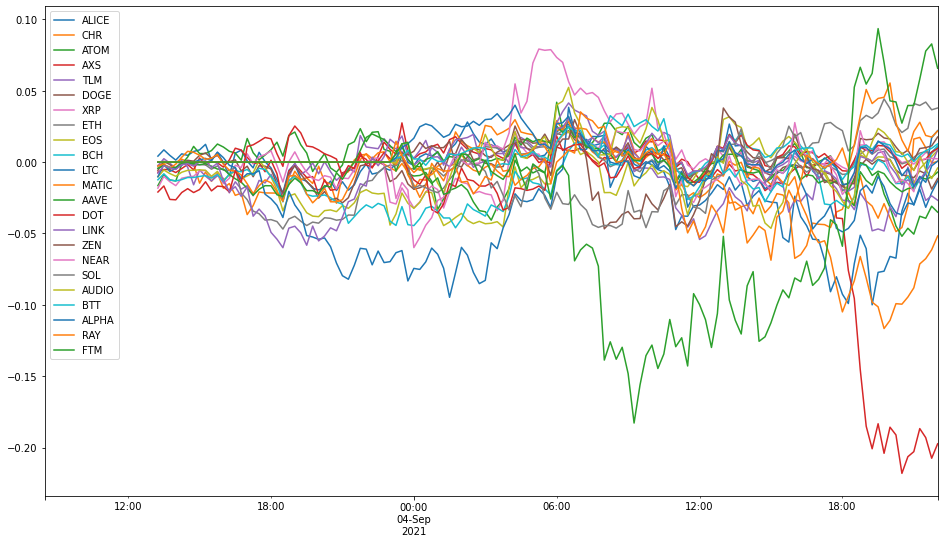

In [14]:

pr.plot(figsize=(16,9))


In [113]:
import plotly.express as px

In [117]:
px.line(pr.iloc[-100:])

<AxesSubplot:>

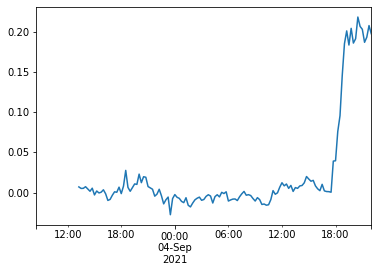

In [125]:
pr = pr * -1
pr["AXS"].plot()

In [121]:
import pandas as pd

In [122]:

cc = pd.DataFrame({"a":[1,2,3,4]})

In [123]:
cc * -1


,a
0,-1
1,-2
2,-3
3,-4


In [124]:
cc

,a
0,1
1,2
2,3
3,4


In [138]:
absf = pr.sum().abs().sort_values()[-10:].index

In [139]:
pr.loc[:,absf]

,NEAR,TLM,CHR,BCH,EOS,ALICE,MATIC,AXS,LTC,FTM
2021-09-03 08:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03 08:45:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03 09:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03 09:15:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-09-03 09:30:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
2021-09-04 21:00:00,0.020765,0.013606,-0.016125,0.019634,0.015198,0.030181,0.088094,0.202844,0.029655,-0.039666
2021-09-04 21:15:00,-0.000998,0.013858,-0.017312,0.012084,0.004734,0.018975,0.071360,0.186691,0.017530,-0.058088
2021-09-04 21:30:00,-0.002443,0.026851,-0.010127,0.008196,0.000276,0.031693,0.067652,0.193005,0.005763,-0.077763
2021-09-04 21:45:00,-0.002603,0.023660,0.000780,-0.006935,-0.003790,0.021426,0.061421,0.207456,-0.017080,-0.082756
